In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('../Data/raw/urldata.csv')
print('First rows of the dataset :')
df.head()

First rows of the dataset :


,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [ ]:
print('Last rows of the dataset :')
df.tail()

Last rows of the dataset :


,Unnamed: 0,url,label,result
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,450174,http://atualizapj.com/,malicious,1
450175,450175,http://writeassociate.com/test/Portal/inicio/I...,malicious,1


In [ ]:
df.shape

(450176, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
url           0
label         0
result        0
dtype: int64

In [ ]:
print('percentage of missing values per column')
df.isnull().sum()/df.shape[0]*100

percentage of missing values per column


Unnamed: 0    0.0
url           0.0
label         0.0
result        0.0
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [ ]:
df[(df['label'] == 'malicious') & (df['result'] != 1)]

,url,label,result


In [ ]:
df[(df['label'] == 'benign') & (df['result'] != 0)]


,url,label,result


In [ ]:
df['url_length'] = df['url'].apply(len)

In [ ]:
print("Overall URL Length Stats:")
print(df['url_length'].describe())

Overall URL Length Stats:
count    450176.000000
mean         60.237849
std          37.571613
min           8.000000
25%          40.000000
50%          52.000000
75%          71.000000
max        2314.000000
Name: url_length, dtype: float64


In [ ]:
print("URL Length Stats for Benign URL")
print(df[df['result'] == 0]['url_length'].describe())

URL Length Stats for Benign URL
count    345738.000000
mean         58.481443
std          25.532656
min          15.000000
25%          42.000000
50%          53.000000
75%          70.000000
max         651.000000
Name: url_length, dtype: float64


In [ ]:
print("URL Length Stats for malicious URL")
print(df[df['result'] == 1]['url_length'].describe())

URL Length Stats for malicious URL
count    104438.000000
mean         66.052366
std          62.310706
min           8.000000
25%          35.000000
50%          50.000000
75%          73.000000
max        2314.000000
Name: url_length, dtype: float64


In [ ]:
plt.figure(figsize=(12, 7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

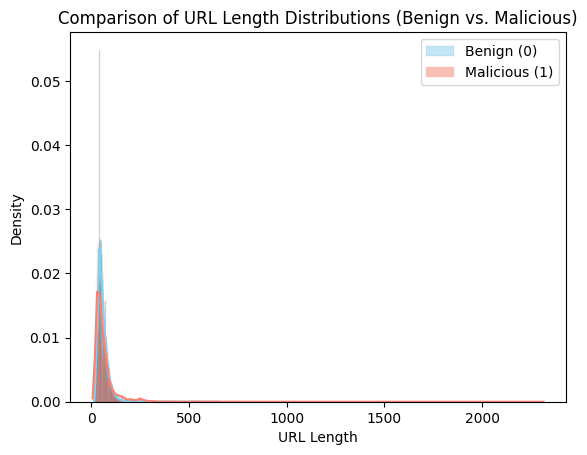

In [ ]:
sns.histplot(df[df['result'] == 0]['url_length'],
             color="skyblue",
             label="Benign (0)",
             kde=True,
             stat="density",
             common_norm=False)
sns.histplot(df[df['result'] == 1]['url_length'],
             color="salmon",
             label="Malicious (1)",
             kde=True,
             stat="density",
             common_norm=False)
plt.title('Comparison of URL Length Distributions (Benign vs. Malicious)')
plt.xlabel('URL Length')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\3188057943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='url_length', data=df, palette=["skyblue", "salmon"]) # Using similar colors


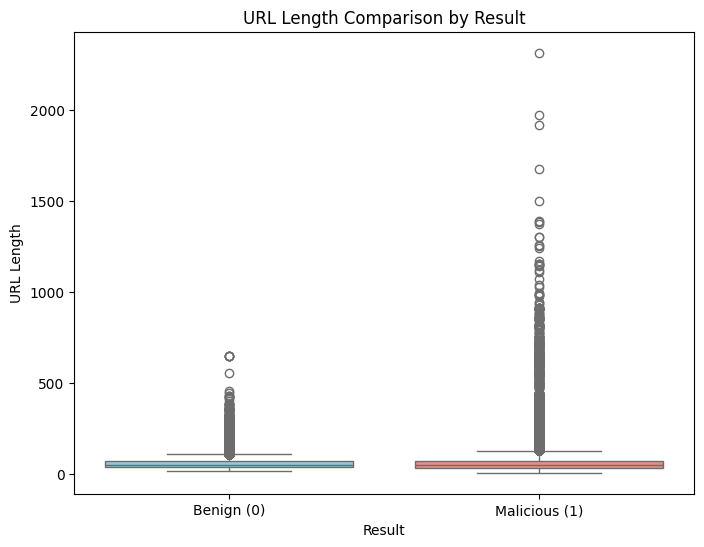

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='url_length', data=df, palette=["skyblue", "salmon"]) # Using similar colors
plt.title('URL Length Comparison by Result')
plt.xlabel('Result')
plt.ylabel('URL Length')
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)']) # Set custom x-axis tick labels
plt.show()

In [ ]:
print("Descriptive Statistics for URL Length by Result:")
url_length_stats = df.groupby('result')['url_length'].describe()
print(url_length_stats)

Descriptive Statistics for URL Length by Result:
           count       mean        std   min   25%   50%   75%     max
result                                                                
0       345738.0  58.481443  25.532656  15.0  42.0  53.0  70.0   651.0
1       104438.0  66.052366  62.310706   8.0  35.0  50.0  73.0  2314.0


In [ ]:
print(df.groupby('result')['url_length'].describe())

           count       mean        std   min   25%   50%   75%     max
result                                                                
0       345738.0  58.481443  25.532656  15.0  42.0  53.0  70.0   651.0
1       104438.0  66.052366  62.310706   8.0  35.0  50.0  73.0  2314.0


In [ ]:
df['num_dots'] = df['url'].apply(lambda x: x.count('.'))

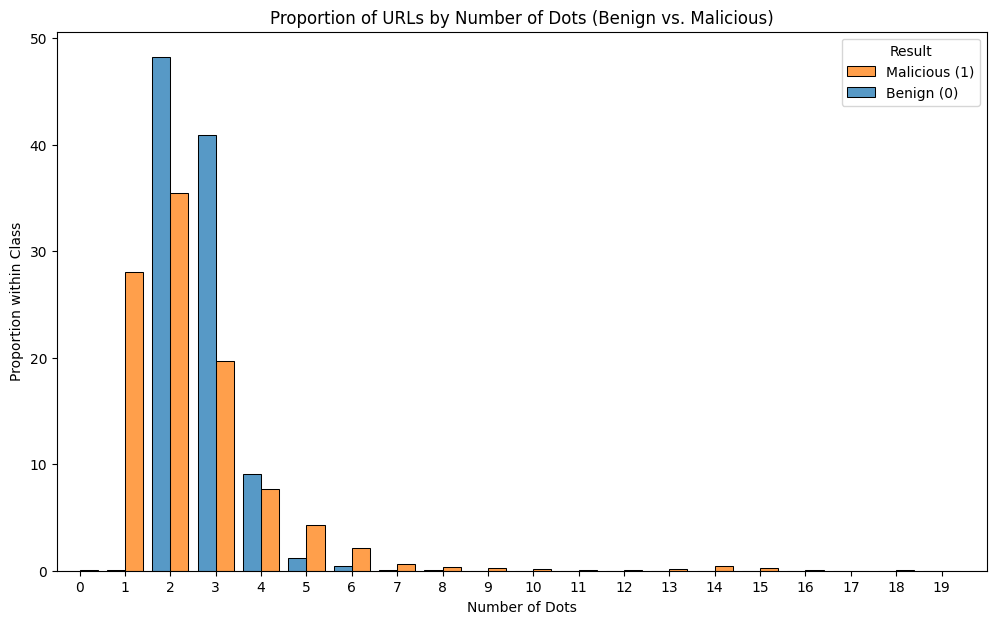

In [ ]:

plt.figure(figsize=(12, 7))


sns.histplot(data=df, x='num_dots', hue='result',
             stat="percent", common_norm=False,  
             multiple="dodge",  
             discrete=True,
             shrink=0.8)  
plt.title('Proportion of URLs by Number of Dots (Benign vs. Malicious)')
plt.xlabel('Number of Dots')
plt.ylabel('Proportion within Class')

plt.xlim(-0.5, 20) 
plt.xticks(range(0, 20))  
plt.legend(title='Result', labels=['Malicious (1)', 'Benign (0)'])  
plt.show()

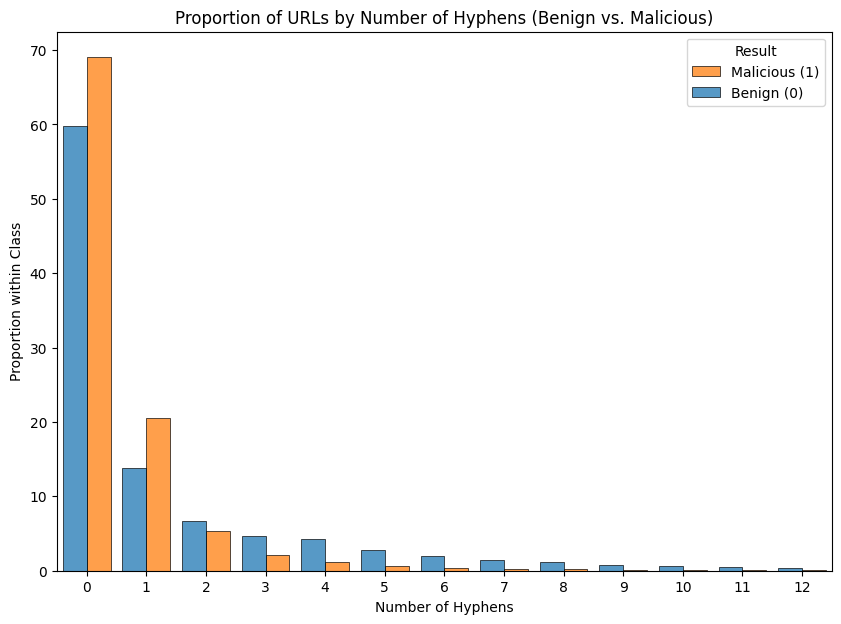

C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\673055069.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='num_hyphens', data=df, palette=["skyblue", "salmon"])


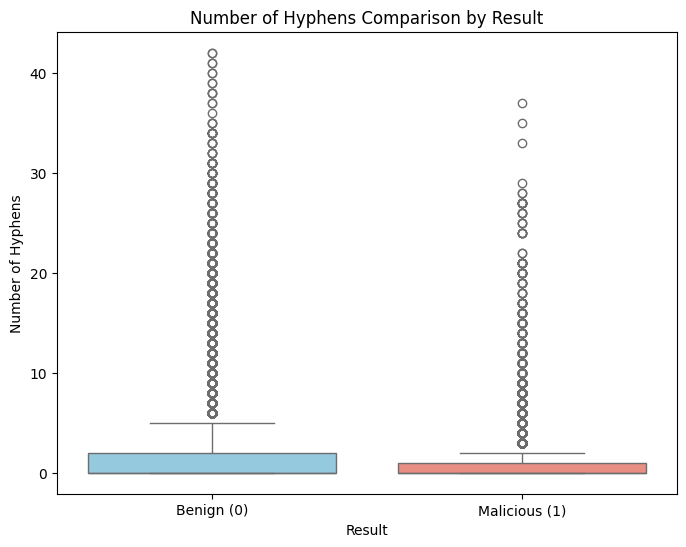


Descriptive Statistics for Number of Hyphens by Result:
           count      mean       std  min  25%  50%  75%   max
result                                                        
0       345738.0  1.461506  2.806444  0.0  0.0  0.0  2.0  42.0
1       104438.0  0.558140  1.334685  0.0  0.0  0.0  1.0  37.0


In [ ]:
if 'num_hyphens' not in df.columns:
    df['num_hyphens'] = df['url'].apply(lambda x: x.count('-'))

plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='num_hyphens', hue='result',
             stat="percent", common_norm=False,
             multiple="dodge", discrete=True, shrink=0.8)
plt.title('Proportion of URLs by Number of Hyphens (Benign vs. Malicious)')
plt.xlabel('Number of Hyphens')
plt.ylabel('Proportion within Class')
plt.xlim(-0.5, df['num_hyphens'].quantile(0.99) + 0.5) 
plt.xticks(range(0, int(df['num_hyphens'].quantile(0.99)) + 1 ))
plt.legend(title='Result', labels=['Malicious (1)', 'Benign (0)'])  
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='num_hyphens', data=df, palette=["skyblue", "salmon"])
plt.title('Number of Hyphens Comparison by Result')
plt.xlabel('Result')
plt.ylabel('Number of Hyphens')
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)'])
plt.show()

print("\nDescriptive Statistics for Number of Hyphens by Result:")
num_hyphens_stats = df.groupby('result')['num_hyphens'].describe()
print(num_hyphens_stats)

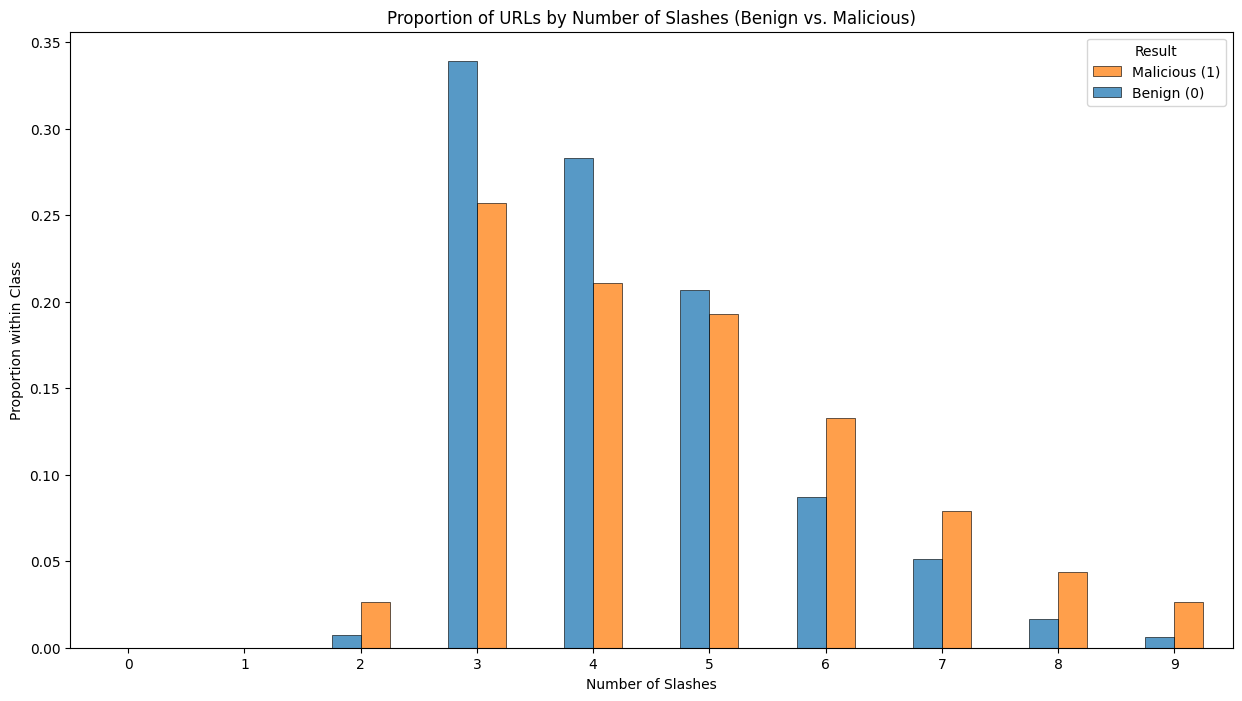

C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\194512509.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='num_slashes', data=df, palette=["skyblue", "salmon"])


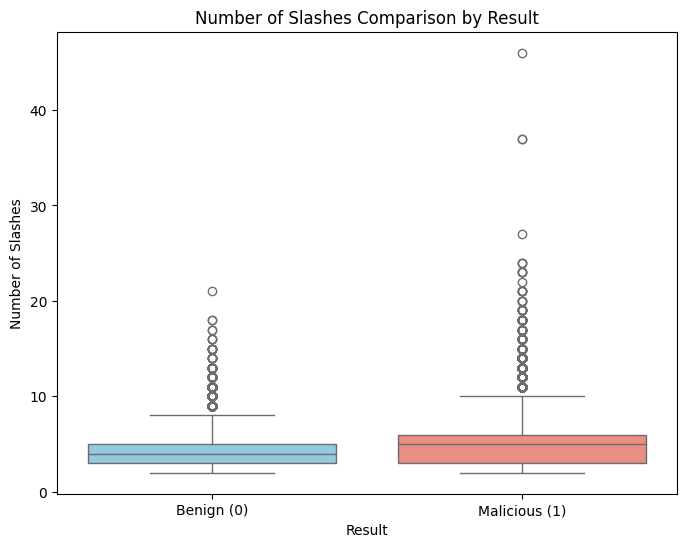


Descriptive Statistics for Number of Slashes by Result:
           count      mean       std  min  25%  50%  75%   max
result                                                        
0       345738.0  4.297908  1.358814  2.0  3.0  4.0  5.0  21.0
1       104438.0  4.927708  2.047854  2.0  3.0  5.0  6.0  46.0


In [ ]:
if 'num_slashes' not in df.columns:
    df['num_slashes'] = df['url'].apply(lambda x: x.count('/'))

plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='num_slashes', hue='result',
             stat="probability", common_norm=False,
             multiple="dodge", discrete=True, shrink=0.5)
plt.title('Proportion of URLs by Number of Slashes (Benign vs. Malicious)')
plt.xlabel('Number of Slashes')
plt.ylabel('Proportion within Class')
plt.xlim(-0.5, df['num_slashes'].quantile(0.99) + 0.5)  
plt.xticks(range(0, int(df['num_slashes'].quantile(0.99)) + 1))
plt.legend(title='Result', labels=['Malicious (1)', 'Benign (0)'])  
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='num_slashes', data=df, palette=["skyblue", "salmon"])
plt.title('Number of Slashes Comparison by Result')
plt.xlabel('Result')
plt.ylabel('Number of Slashes')
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)'])
plt.show()

print("\nDescriptive Statistics for Number of Slashes by Result:")
num_slashes_stats = df.groupby('result')['num_slashes'].describe()
print(num_slashes_stats)

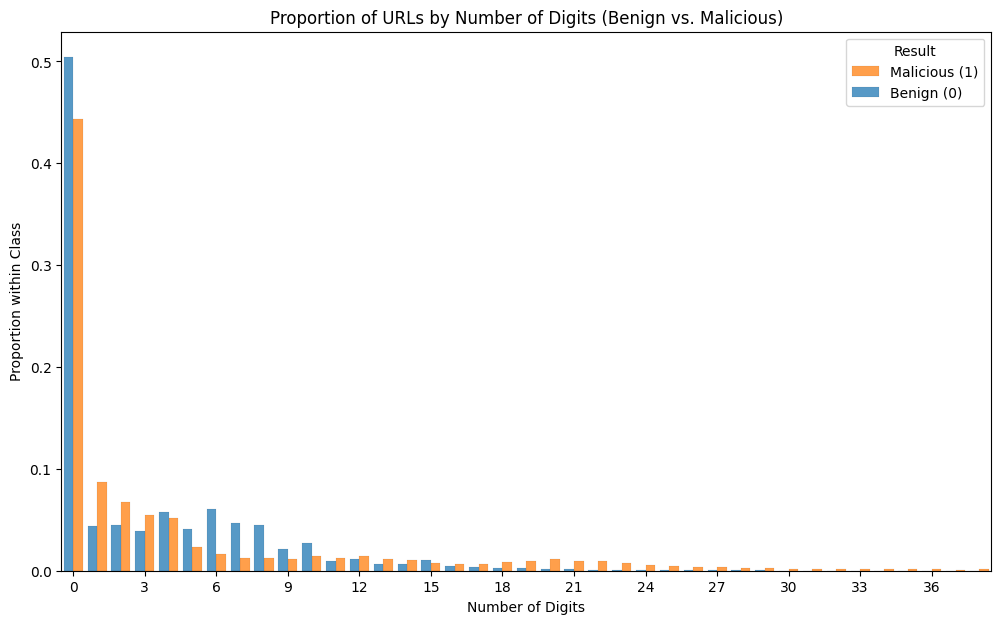

C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\1485740638.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='num_digits', data=df, palette=["skyblue", "salmon"])


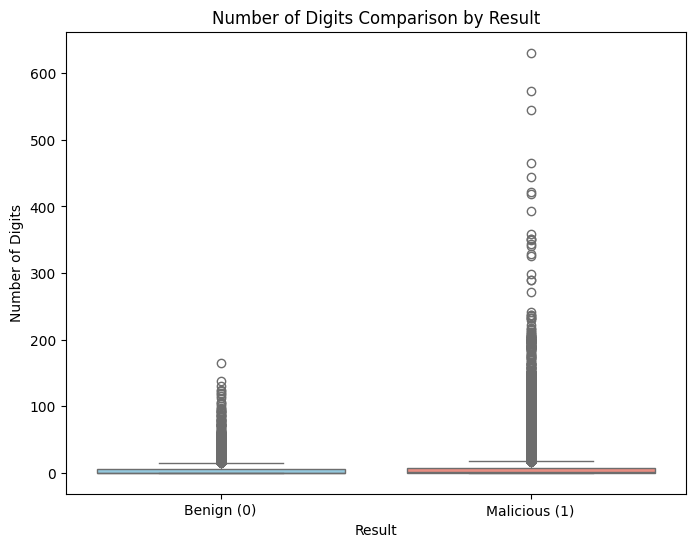


Descriptive Statistics for Number of Digits by Result:
           count      mean        std  min  25%  50%  75%    max
result                                                          
0       345738.0  3.275819   4.829775  0.0  0.0  0.0  6.0  165.0
1       104438.0  7.234158  16.653128  0.0  0.0  1.0  7.0  631.0


In [ ]:
import re  

if 'num_digits' not in df.columns:
    def count_digits(url_string):
        if isinstance(url_string, str):
            return sum(c.isdigit() for c in url_string)
        return 0  
    df['num_digits'] = df['url'].apply(count_digits)


plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='num_digits', hue='result',
             stat="probability", common_norm=False,
             multiple="dodge", discrete=True, shrink=0.8)

plt.title('Proportion of URLs by Number of Digits (Benign vs. Malicious)')
plt.xlabel('Number of Digits')
plt.ylabel('Proportion within Class')




upper_limit_digits = int(df['num_digits'].quantile(0.99))
if upper_limit_digits < 10:
    upper_limit_digits = 20
plt.xlim(-0.5, upper_limit_digits + 0.5)
plt.xticks(range(0, upper_limit_digits + 1, max(1, upper_limit_digits // 10)))  
plt.legend(title='Result', labels=['Malicious (1)', 'Benign (0)']) 

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='num_digits', data=df, palette=["skyblue", "salmon"])
plt.title('Number of Digits Comparison by Result')
plt.xlabel('Result')
plt.ylabel('Number of Digits')
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)'])
plt.show()

print("\nDescriptive Statistics for Number of Digits by Result:")
num_digits_stats = df.groupby('result')['num_digits'].describe()
print(num_digits_stats)

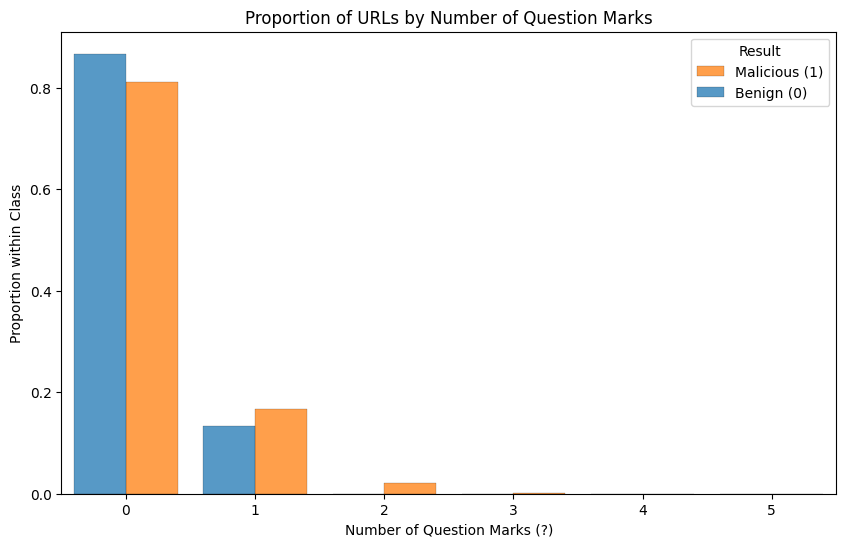

C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\1319919045.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='num_qmarks', data=df, palette=["skyblue", "salmon"])


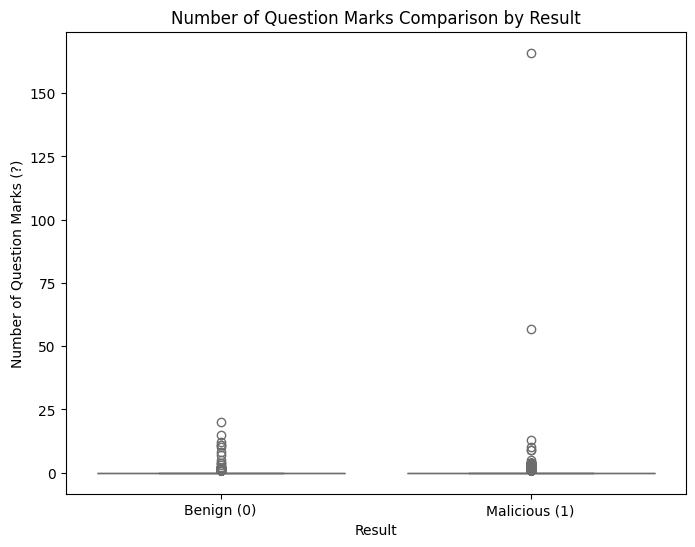


Descriptive Statistics for Number of Question Marks by Result:
           count      mean       std  min  25%  50%  75%    max
result                                                         
0       345738.0  0.133451  0.345697  0.0  0.0  0.0  0.0   20.0
1       104438.0  0.217086  0.722271  0.0  0.0  0.0  0.0  166.0


In [ ]:
if 'num_qmarks' not in df.columns:
    df['num_qmarks'] = df['url'].apply(lambda x: x.count('?') if isinstance(x, str) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_qmarks', hue='result',
             stat="probability", common_norm=False,
             multiple="dodge", discrete=True, shrink=0.8)
plt.title('Proportion of URLs by Number of Question Marks')
plt.xlabel('Number of Question Marks (?)')
plt.ylabel('Proportion within Class')
 
max_qmarks = df['num_qmarks'].max()
plt.xlim(-0.5, max_qmarks + 0.5 if max_qmarks < 5 else 5.5)  
plt.xticks(range(0, int(max_qmarks) + 1 if max_qmarks < 5 else 6))
plt.legend(title='Result', labels=['Malicious (1)', 'Benign (0)'])

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='num_qmarks', data=df, palette=["skyblue", "salmon"])
plt.title('Number of Question Marks Comparison by Result')
plt.xlabel('Result')
plt.ylabel('Number of Question Marks (?)')
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)'])
plt.show()


print("\nDescriptive Statistics for Number of Question Marks by Result:")
num_qmarks_stats = df.groupby('result')['num_qmarks'].describe()
print(num_qmarks_stats)


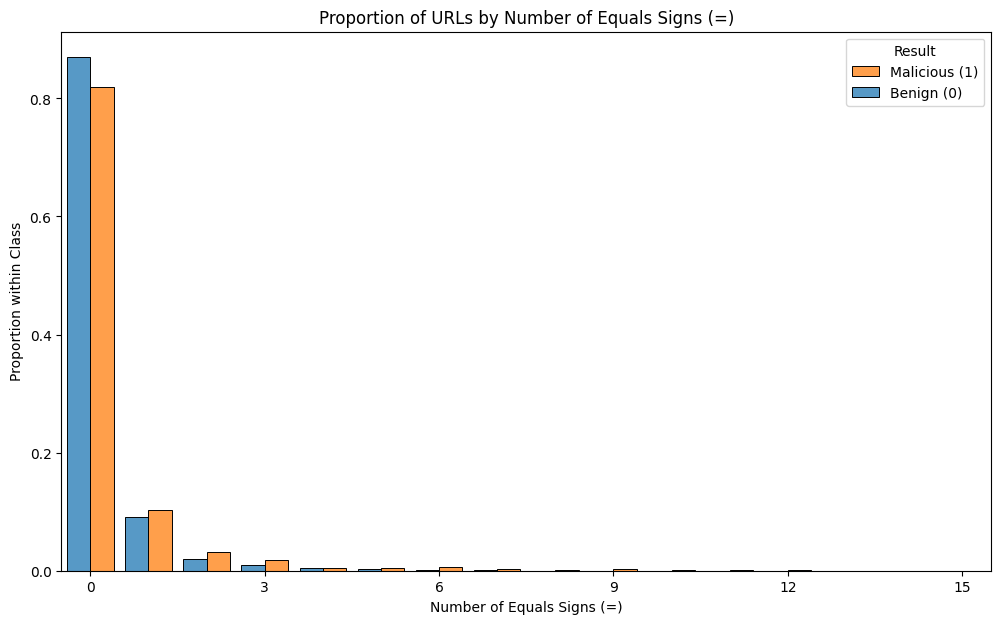


Descriptive Statistics for Number of Equals Signs by Result:
           count      mean       std  min  25%  50%  75%   max
result                                                        
0       345738.0  0.209141  0.731129  0.0  0.0  0.0  0.0  34.0
1       104438.0  0.419933  1.330099  0.0  0.0  0.0  0.0  27.0


C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\823311631.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='num_equals', data=df, palette=["skyblue", "salmon"])


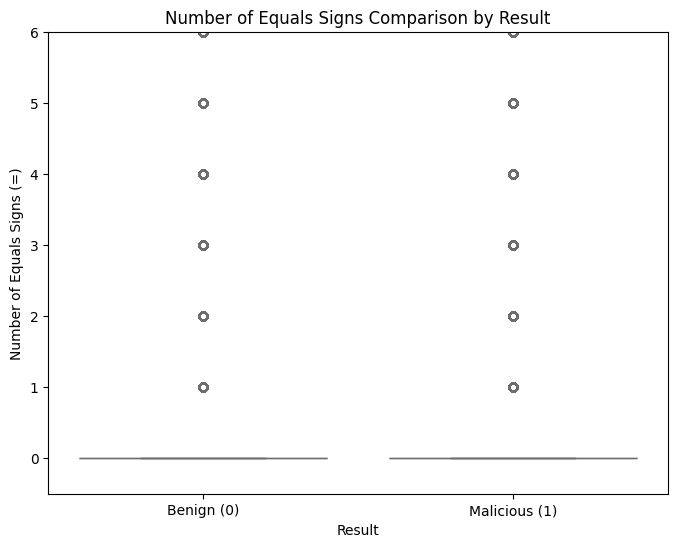

In [ ]:
if 'num_equals' not in df.columns:
    df['num_equals'] = df['url'].apply(lambda x: x.count('=') if isinstance(x, str) else 0)

plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='num_equals', hue='result',
             stat="probability", common_norm=False,
             multiple="dodge", discrete=True, shrink=0.8)
plt.title('Proportion of URLs by Number of Equals Signs (=)')
plt.xlabel('Number of Equals Signs (=)')
plt.ylabel('Proportion within Class')
upper_limit_equals = int(df['num_equals'].quantile(0.99)) #  up to 99th percentile
if upper_limit_equals < 5:  
    upper_limit_equals = 15
plt.xlim(-0.5, upper_limit_equals + 0.5)
plt.xticks(range(0, upper_limit_equals + 1, max(1, upper_limit_equals // 5)))  
plt.legend(title='Result', labels=['Malicious (1)', 'Benign (0)'])  
plt.show()

print("\nDescriptive Statistics for Number of Equals Signs by Result:")
num_equals_stats = df.groupby('result')['num_equals'].describe()
print(num_equals_stats)

plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='num_equals', data=df, palette=["skyblue", "salmon"])
plt.title('Number of Equals Signs Comparison by Result')
plt.xlabel('Result')
plt.ylabel('Number of Equals Signs (=)')
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)'])
# Optional: Zoom y-axis if outliers are extreme
plt.ylim(-0.5, df['num_equals'].quantile(0.99) + 2)
plt.show()

In [ ]:
# Malicious URLs seem slightly more likely to have some parameters (1 or 2 equals signs).
# Malicious URLs also show a tendency to have a larger number of equals signs when they do use them, suggesting potentially more 
# complex query strings. This aligns with the hypothesis that they might be used for data exfiltration or passing more complex commands/payloads.

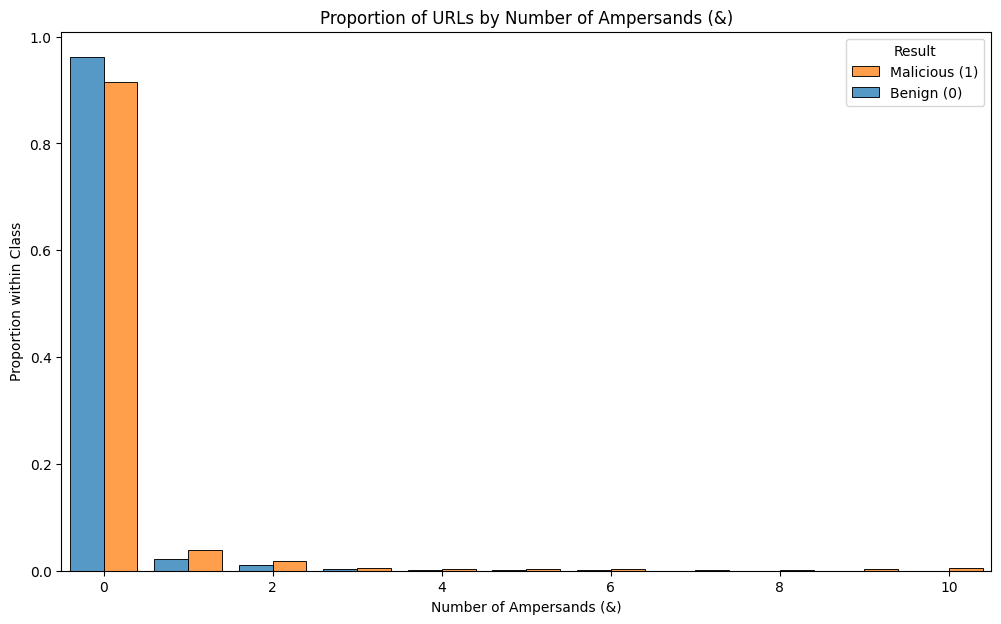


Descriptive Statistics for Number of Ampersands by Result:
           count      mean       std  min  25%  50%  75%   max
result                                                        
0       345738.0  0.076081  0.525597  0.0  0.0  0.0  0.0  37.0
1       104438.0  0.279467  1.338739  0.0  0.0  0.0  0.0  28.0


C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\702745527.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='num_ampersands', data=df, palette=["skyblue", "salmon"])


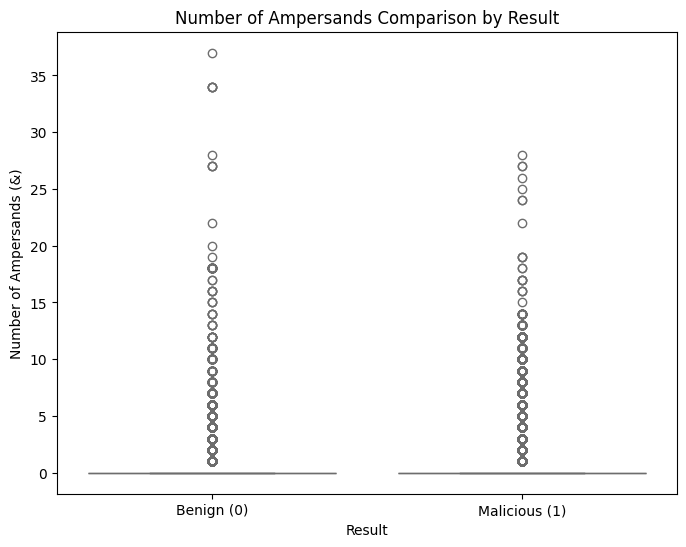

In [ ]:
if 'num_ampersands' not in df.columns:
    df['num_ampersands'] = df['url'].apply(lambda x: x.count('&') if isinstance(x, str) else 0)

plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='num_ampersands', hue='result',
             stat="probability", common_norm=False,
             multiple="dodge", discrete=True, shrink=0.8)
plt.title('Proportion of URLs by Number of Ampersands (&)')
plt.xlabel('Number of Ampersands (&)')
plt.ylabel('Proportion within Class')
upper_limit_amp = int(df['num_ampersands'].quantile(0.99))
if upper_limit_amp < 5:
    upper_limit_amp = 10
plt.xlim(-0.5, upper_limit_amp + 0.5)
plt.xticks(range(0, upper_limit_amp + 1, max(1, upper_limit_amp // 5)))
plt.legend(title='Result', labels=['Malicious (1)', 'Benign (0)'])
plt.show()

print("\nDescriptive Statistics for Number of Ampersands by Result:")
num_ampersands_stats = df.groupby('result')['num_ampersands'].describe()
print(num_ampersands_stats)

plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='num_ampersands', data=df, palette=["skyblue", "salmon"])
plt.title('Number of Ampersands Comparison by Result')
plt.xlabel('Result')
plt.ylabel('Number of Ampersands (&)')
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)'])
# plt.ylim(-0.5, df['num_ampersands'].quantile(0.99) + 2)
plt.show()

In [ ]:
features_for_correlation = df.select_dtypes(include='number')  

correlation_matrix_target = features_for_correlation.corr()


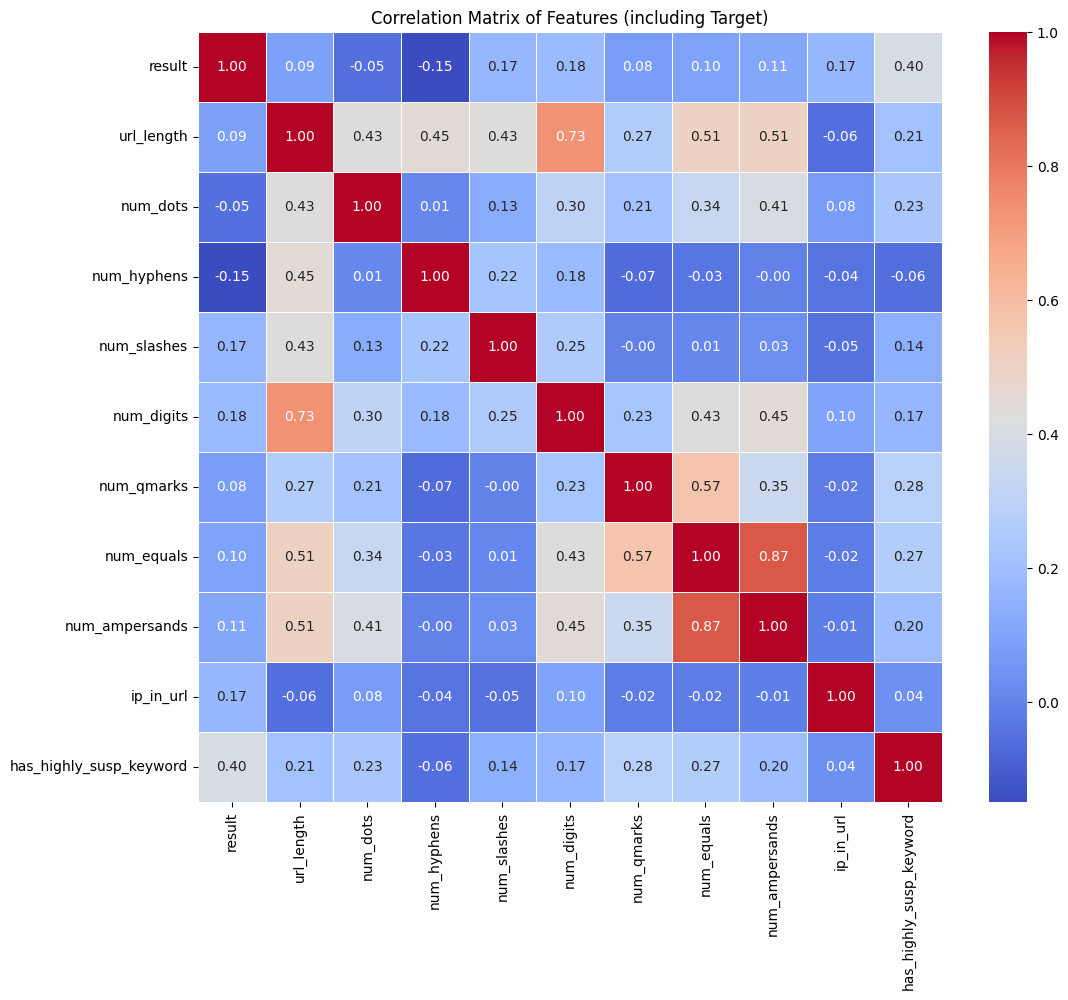

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features (including Target)')
plt.show()

In [ ]:
from urllib.parse import urlparse
hostname = urlparse("http://123.45.67.89/malicious.exe").hostname
print(hostname)

123.45.67.89


In [ ]:
import re
from urllib.parse import urlparse

# (?:25[0-5]            # matches 250 to 255
# | 2[0-4][0-9]         # matches 200 to 249
# | [01]?[0-9][0-9]?)   # matches 0 to 199 (optional leading 0 or 1)

# (?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?) # same thing just no .

ip_pattern = re.compile(
    r"^(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}"
    r"(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$"
)

def has_ip_in_hostname(url_string):
    if not isinstance(url_string, str):
        return 0
    try:
        hostname = urlparse(url_string).hostname
        if hostname:
            if ip_pattern.fullmatch(hostname): 
                
                return 1 
    except Exception:  
        return 0
    return 0


In [ ]:
if 'ip_in_url' not in df.columns:
    df['ip_in_url'] = df['url'].apply(has_ip_in_hostname)

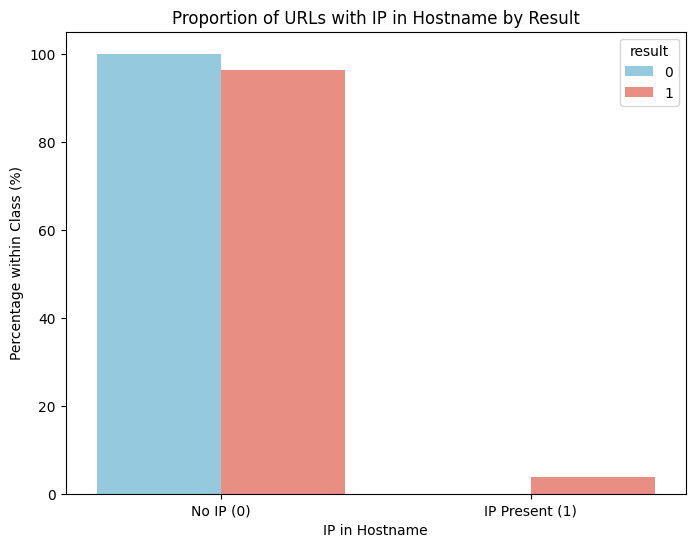

In [ ]:
ip_proportions = df.groupby('result')['ip_in_url'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='ip_in_url', y='percentage', hue='result', data=ip_proportions, palette=["skyblue", "salmon"])
plt.title('Proportion of URLs with IP in Hostname by Result')
plt.xlabel('IP in Hostname')
plt.ylabel('Percentage within Class (%)')
plt.xticks([0, 1], ['No IP (0)', 'IP Present (1)'])
plt.show()


In [ ]:
print("\nDescriptive Statistics for IP_in_URL by Result:")
ip_in_url_stats = df.groupby('result')['ip_in_url'].describe()
print(ip_in_url_stats)


Descriptive Statistics for IP_in_URL by Result:
           count     mean       std  min  25%  50%  75%  max
result                                                      
0       345738.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0
1       104438.0  0.03786  0.190858  0.0  0.0  0.0  0.0  1.0


In [ ]:
highly_suspicious_words_ci = [  
    "secure", "account", "login", "signin", "banking", "confirm",
    "logon", "signon", "paypal", "payment", "ebay" , ".php", "abuse", "admin"
]
highly_suspicious_patterns_cs = [ 
    "webscr", "ebayisapi",
    "login.asp", "login.php", "login.htm",
    ".exe", ".zip", ".rar",  
    "dbsys.php",
    "config.bin",
    "download.php",
    ".jar", ".swf", ".cgi"  
]



In [ ]:
df.rename(columns={'has_suspicious_keyword': 'has_highly_suspicious_keyword'}, inplace=True)

In [ ]:
df = df.drop('has_highly_suspicious_keyword', axis=1)


In [ ]:
def check_for_highly_suspicious(url_string):
    if not isinstance(url_string, str): return 0
    url_lower = url_string.lower()
    for word in highly_suspicious_words_ci:
        if word in url_lower: return 1
    for pattern in highly_suspicious_patterns_cs:
        if pattern in url_string: return 1
    return 0

df['has_highly_susp_keyword'] = df['url'].apply(check_for_highly_suspicious)

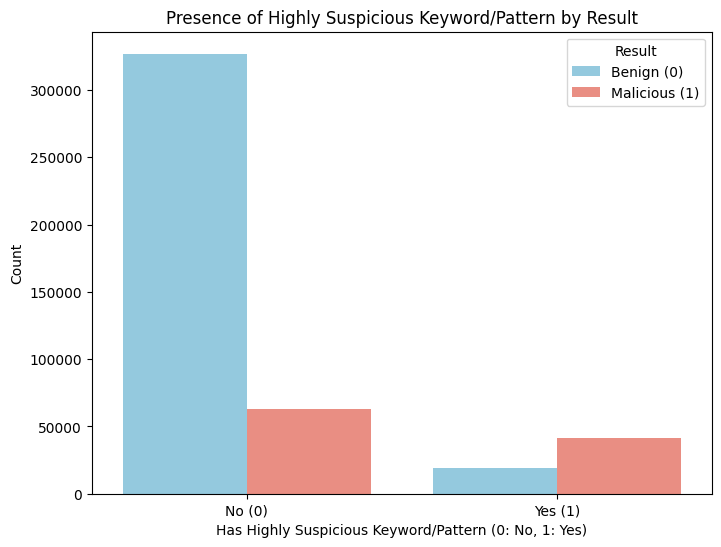

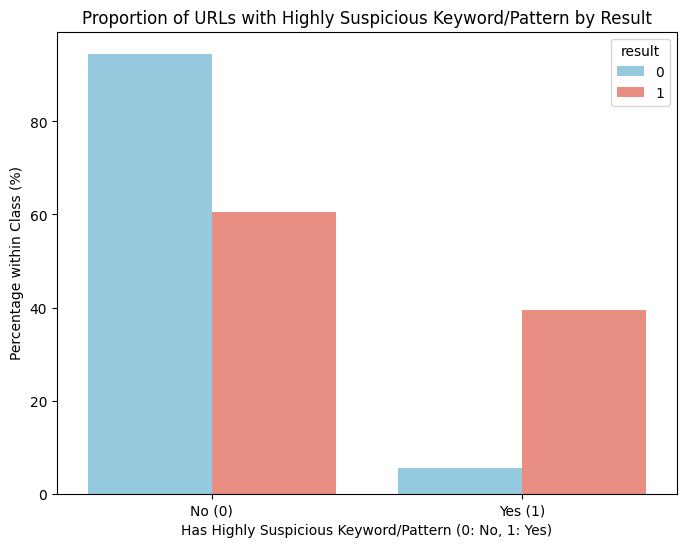


Descriptive Statistics for has_highly_susp_keyword by Result:
           count      mean       std  min  25%  50%  75%  max
result                                                       
0       345738.0  0.054550  0.227100  0.0  0.0  0.0  0.0  1.0
1       104438.0  0.394559  0.488758  0.0  0.0  0.0  1.0  1.0

Correlation of has_highly_susp_keyword with target:
0.42206845429461604


In [ ]:
feature_to_explore = 'has_highly_susp_keyword'  
feature_name_pretty = 'Highly Suspicious Keyword/Pattern'

plt.figure(figsize=(8, 6))
sns.countplot(x=feature_to_explore, hue='result', data=df, palette=["skyblue", "salmon"])
plt.title(f'Presence of {feature_name_pretty} by Result')
plt.xlabel(f'Has {feature_name_pretty} (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Benign (0)', 'Malicious (1)'], title='Result')
plt.show()

proportions_df = df.groupby('result')[feature_to_explore].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_to_explore, y='percentage', hue='result', data=proportions_df, palette=["skyblue", "salmon"])
plt.title(f'Proportion of URLs with {feature_name_pretty} by Result')
plt.xlabel(f'Has {feature_name_pretty} (0: No, 1: Yes)')
plt.ylabel('Percentage within Class (%)')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

print(f"\nDescriptive Statistics for {feature_to_explore} by Result:")
stats_df = df.groupby('result')[feature_to_explore].describe()
print(stats_df)

if feature_to_explore in df.columns and df[feature_to_explore].nunique() > 1:
    print(f"\nCorrelation of {feature_to_explore} with target:")
    print(df[[feature_to_explore, 'result']].corr()['result'][feature_to_explore])
else:
    print(f"\n{feature_to_explore} feature either not created or has no variance.")

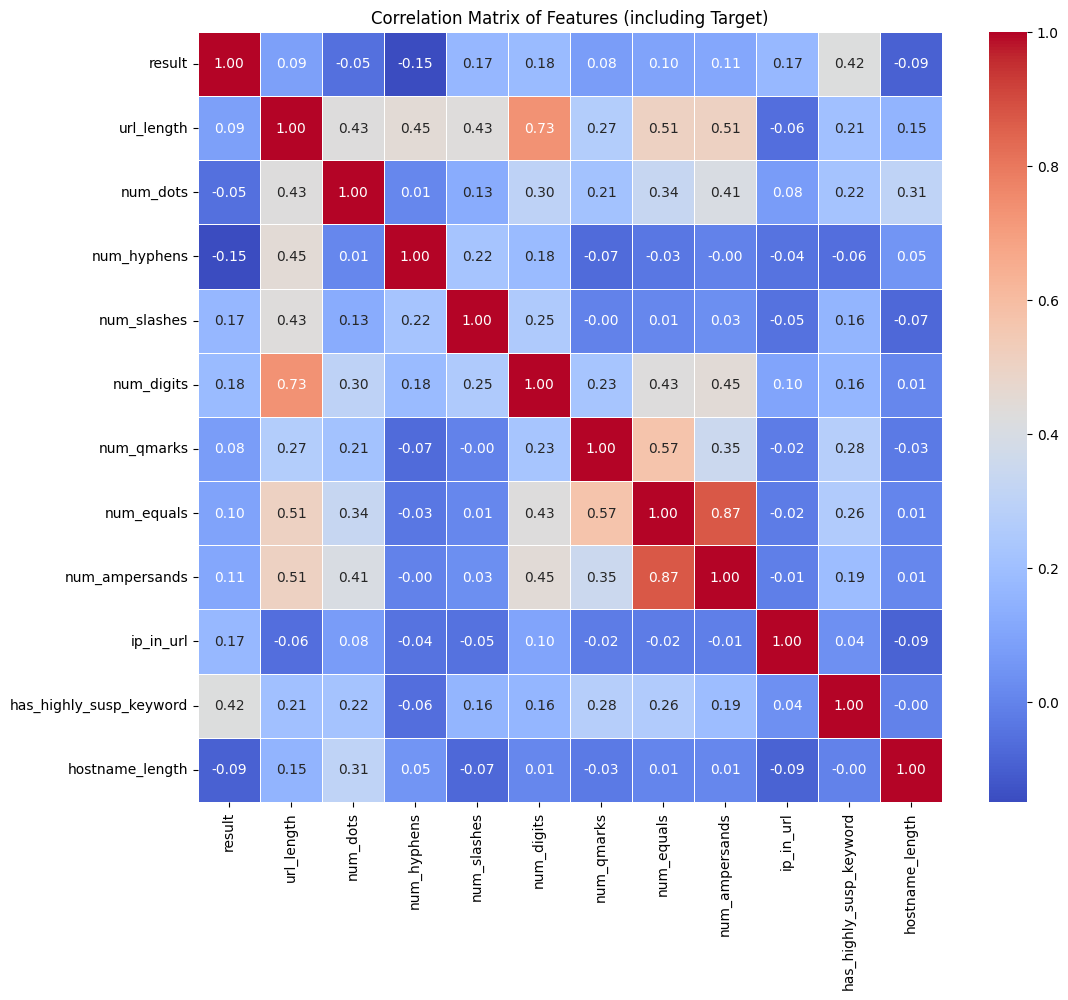

In [ ]:
features_for_correlation = df.select_dtypes(include='number') 

correlation_matrix_target = features_for_correlation.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Features (including Target)')
plt.show()


In [ ]:
http_present_series = df['url'].str.lower().str.contains('http', na=False)

https_present_series = df['url'].str.lower().str.contains('https', na=False)


benign_urls_mask = (df['result'] == 0)
total_benign_urls = benign_urls_mask.sum()

num_benign_with_http = http_present_series[benign_urls_mask].sum()
num_benign_with_https = https_present_series[benign_urls_mask].sum()

if total_benign_urls > 0:
    perc_benign_with_http = (num_benign_with_http / total_benign_urls) * 100
    perc_benign_with_https = (num_benign_with_https / total_benign_urls) * 100
else:
    perc_benign_with_http = 0
    perc_benign_with_https = 0

malicious_urls_mask = (df['result'] == 1)
total_malicious_urls = malicious_urls_mask.sum()

num_malicious_with_http = http_present_series[malicious_urls_mask].sum()
num_malicious_with_https = https_present_series[malicious_urls_mask].sum()

if total_malicious_urls > 0:
    perc_malicious_with_http = (num_malicious_with_http / total_malicious_urls) * 100
    perc_malicious_with_https = (num_malicious_with_https / total_malicious_urls) * 100
else:
    perc_malicious_with_http = 0
    perc_malicious_with_https = 0

print("--- Benign URLs ---")
print(f"Total benign URLs: {total_benign_urls}")
print(f"Number of benign URLs containing 'http': {num_benign_with_http} ({perc_benign_with_http:.2f}%)")
print(f"Number of benign URLs containing 'https': {num_benign_with_https} ({perc_benign_with_https:.2f}%)")

print("\n--- Malicious URLs ---")
print(f"Total malicious URLs: {total_malicious_urls}")
print(f"Number of malicious URLs containing 'http': {num_malicious_with_http} ({perc_malicious_with_http:.2f}%)")
print(f"Number of malicious URLs containing 'https': {num_malicious_with_https} ({perc_malicious_with_https:.2f}%)")


--- Benign URLs ---
Total benign URLs: 345738
Number of benign URLs containing 'http': 345737 (100.00%)
Number of benign URLs containing 'https': 345737 (100.00%)

--- Malicious URLs ---
Total malicious URLs: 104438
Number of malicious URLs containing 'http': 104431 (99.99%)
Number of malicious URLs containing 'https': 7294 (6.98%)


In [ ]:
if 'has_https' not in df.columns:
    df['has_https'] = https_present_series.astype(int)
    print("Added 'has_https' column to DataFrame.")

Added 'has_https' column to DataFrame.


In [ ]:
if 'is_http_only' not in df.columns:
    df['is_http_only'] = (http_present_series & ~https_present_series).astype(int)
    print("Added 'is_http_only' column to DataFrame.")

Added 'is_http_only' column to DataFrame.


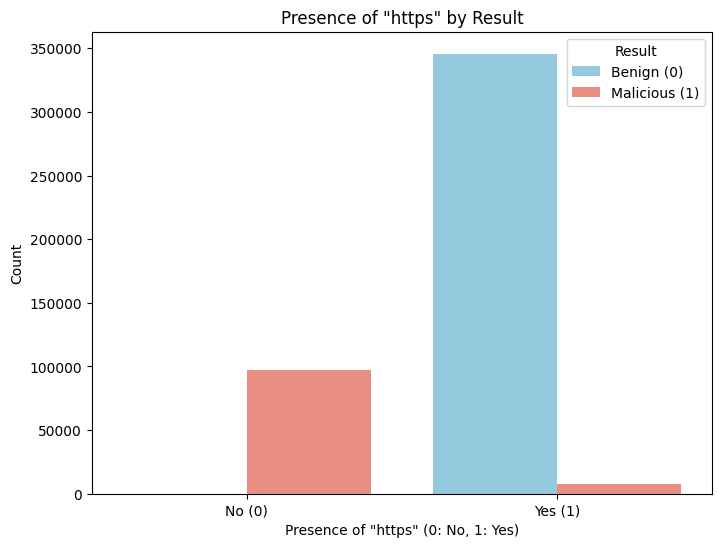

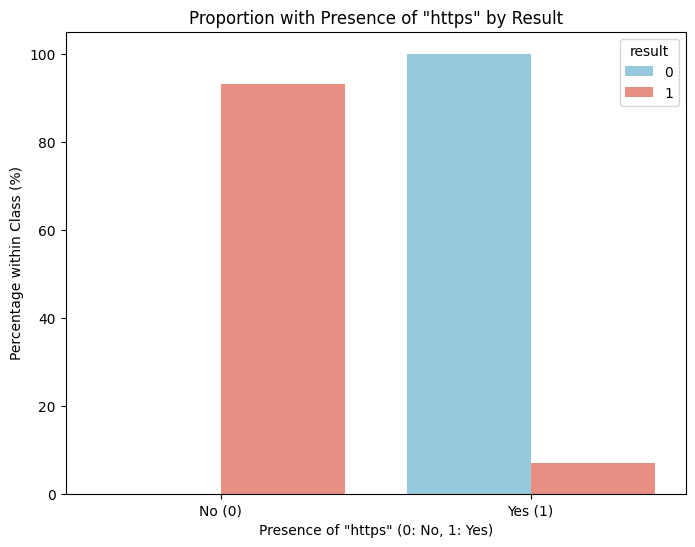


Descriptive Statistics for has_https by Result:
           count      mean       std  min  25%  50%  75%  max
result                                                       
0       345738.0  0.999997  0.001701  0.0  1.0  1.0  1.0  1.0
1       104438.0  0.069840  0.254879  0.0  0.0  0.0  0.0  1.0

Correlation of has_https with target:
-0.9544260145491495


In [ ]:
feature_to_explore = 'has_https'
feature_name_pretty = 'Presence of "https"'

plt.figure(figsize=(8, 6))
sns.countplot(x=feature_to_explore, hue='result', data=df, palette=["skyblue", "salmon"])
plt.title(f'{feature_name_pretty} by Result')
plt.xlabel(f'{feature_name_pretty} (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Benign (0)', 'Malicious (1)'], title='Result')
plt.show()

proportions_df = df.groupby('result')[feature_to_explore].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_to_explore, y='percentage', hue='result', data=proportions_df, palette=["skyblue", "salmon"])
plt.title(f'Proportion with {feature_name_pretty} by Result')
plt.xlabel(f'{feature_name_pretty} (0: No, 1: Yes)')
plt.ylabel('Percentage within Class (%)')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

print(f"\nDescriptive Statistics for {feature_to_explore} by Result:")
stats_df = df.groupby('result')[feature_to_explore].describe()
print(stats_df)

if feature_to_explore in df.columns and df[feature_to_explore].nunique() > 1:
    print(f"\nCorrelation of {feature_to_explore} with target:")
    print(df[[feature_to_explore, 'result']].corr()['result'][feature_to_explore])
else:
    print(f"\n{feature_to_explore} feature has no variance or not created.")

In [ ]:
df = df.drop('has_https', axis=1)


In [ ]:
df = df.drop('is_http_only', axis=1)

In [ ]:
df = df.drop('has_www_in_hostname', axis=1)


In [ ]:
df

,url,label,result,url_length,num_dots,num_hyphens,num_slashes,num_digits,num_qmarks,num_equals,num_ampersands,ip_in_url,has_highly_susp_keyword
0,https://www.google.com,benign,0,22,2,0,2,0,0,0,0,0,0
1,https://www.youtube.com,benign,0,23,2,0,2,0,0,0,0,0,0
2,https://www.facebook.com,benign,0,24,2,0,2,0,0,0,0,0,0
3,https://www.baidu.com,benign,0,21,2,0,2,0,0,0,0,0,0
4,https://www.wikipedia.org,benign,0,25,2,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,2,1,5,0,0,0,0,0,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,2,0,14,21,0,1,0,0,0
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,1,0,14,20,0,1,0,0,0
450174,http://atualizapj.com/,malicious,1,22,1,0,3,0,0,0,0,0,0


In [ ]:
total_benign = df[df['result'] == 0].shape[0]
total_malicious = df[df['result'] == 1].shape[0]

benign_tlds_perc = (benign_tlds / total_benign) * 100
malicious_tlds_perc = (malicious_tlds / total_malicious) * 100


C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\1712960509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=benign_tlds_perc.values, y=benign_tlds_perc.index, ax=axes[0], palette="Blues_r")
C:\Users\ayaqa\AppData\Local\Temp\ipykernel_15456\1712960509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=malicious_tlds_perc.values, y=malicious_tlds_perc.index, ax=axes[1], palette="Oranges_r")


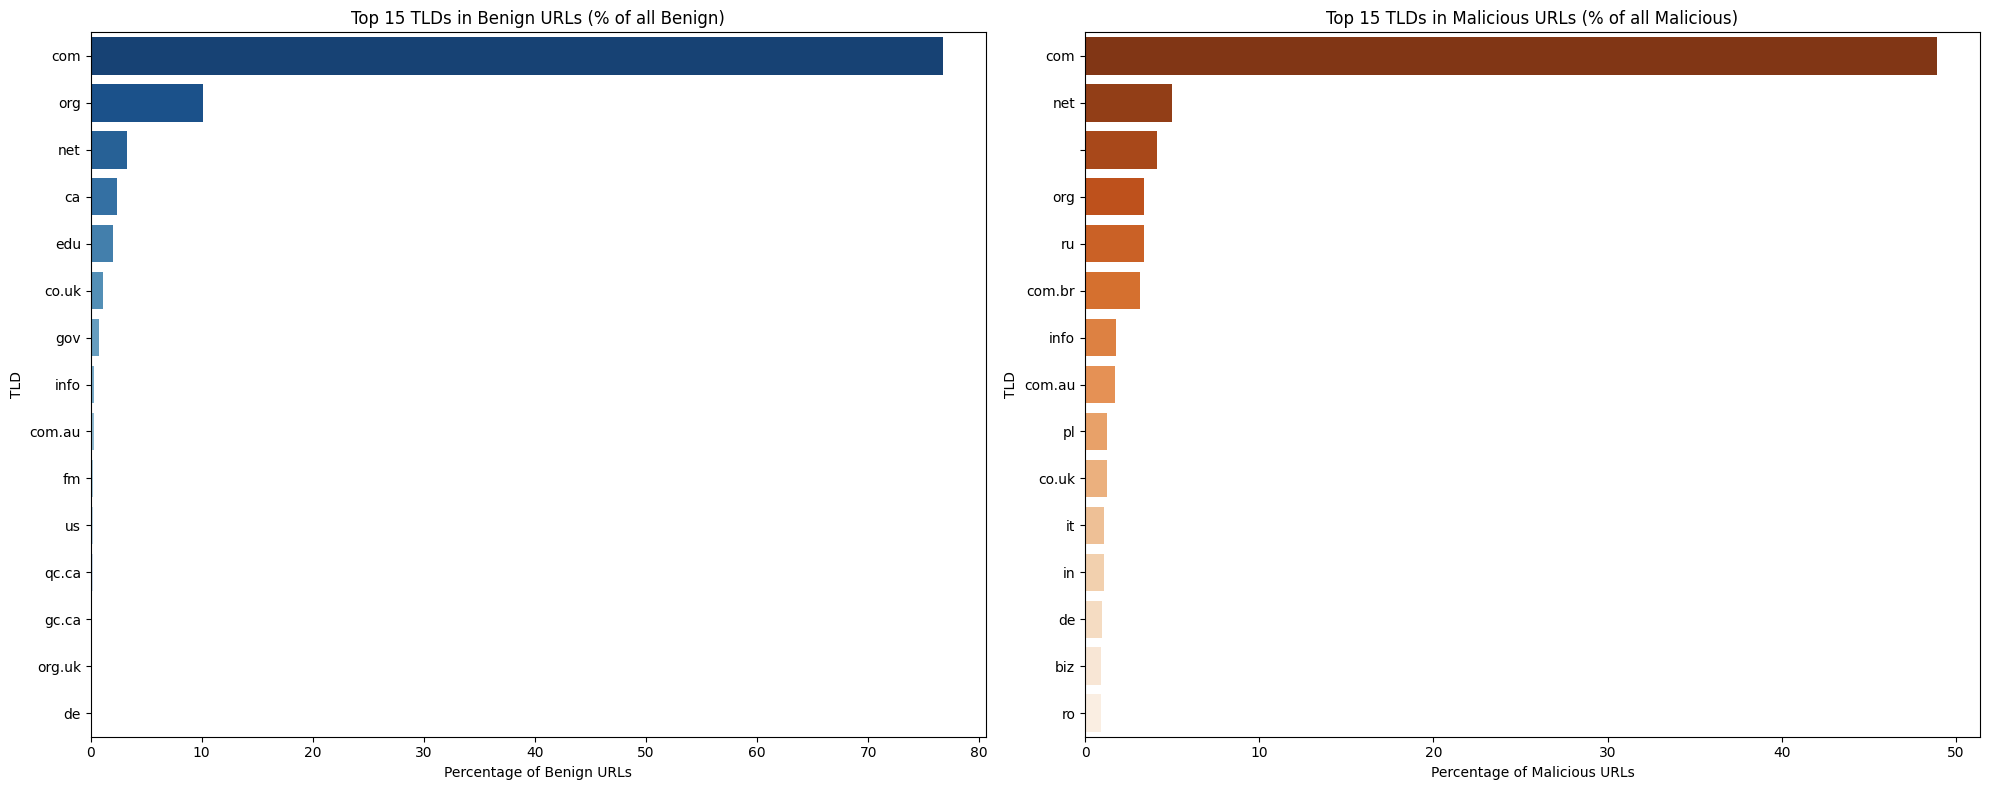

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  
if not benign_tlds_perc.empty:
    sns.barplot(x=benign_tlds_perc.values, y=benign_tlds_perc.index, ax=axes[0], palette="Blues_r")
    axes[0].set_title(f'Top {len(benign_tlds_perc)} TLDs in Benign URLs (% of all Benign)')
    axes[0].set_xlabel('Percentage of Benign URLs')
    axes[0].set_ylabel('TLD')
else:
    axes[0].set_title(f'No Benign URL TLD data to plot')


if not malicious_tlds_perc.empty:
    sns.barplot(x=malicious_tlds_perc.values, y=malicious_tlds_perc.index, ax=axes[1], palette="Oranges_r")
    axes[1].set_title(f'Top {len(malicious_tlds_perc)} TLDs in Malicious URLs (% of all Malicious)')
    axes[1].set_xlabel('Percentage of Malicious URLs')
    axes[1].set_ylabel('TLD')
else:
    axes[1].set_title(f'No Malicious URL TLD data to plot')


plt.tight_layout() #
plt.show()

In [ ]:
df['tld'].nunique()

832

In [ ]:
tld_counts = df['tld'].value_counts()
print("Top 20 TLDs:")
print(tld_counts.head(20))
print(f"\nTLDs appearing only once: {(tld_counts == 1).sum()}")
print(f"TLDs appearing 5 times or less: {(tld_counts <= 5).sum()}")

Top 20 TLDs:
tld
com       316414
org        38393
net        16590
ca          8825
edu         6976
co.uk       5213
            4322
ru          3736
com.br      3389
info        2985
com.au      2764
gov         2604
pl          1410
de          1356
it          1351
in          1300
biz         1219
us          1082
ro           979
co.za        876
Name: count, dtype: int64

TLDs appearing only once: 225
TLDs appearing 5 times or less: 462


In [ ]:
output_csv_filename = "../Data/processed/urldata-v1.csv"

try:
    df.to_csv(output_csv_filename, index=False)
    print(f"DataFrame successfully saved to '{output_csv_filename}'")
except Exception as e:
    print(f"Error saving DataFrame to CSV: {e}")


DataFrame successfully saved to '../Data/processed/urldata-v1.csv'


In [ ]:
df_copy = df

In [ ]:
df_copy = df.drop('num_equals',axis=1)

In [ ]:
new_csv = "../Data/processed/urldata-v2-noEquals.csv"

try:
    df.to_csv(new_csv, index=False)
    print(f"DataFrame successfully saved to '{new_csv}'")
except Exception as e:
    print(f"Error saving DataFrame to CSV: {e}")


DataFrame successfully saved to '../Data/processed/urldata-v2-noEquals.csv'
